# Clustering the Military Powers of Countries

Bu projemizde elimizde askeri güç ve buna bağlı olan verileri içeren DataFrame'imiz var. Bu veri setiyle ülkelerin askeri kapasite ve kaynakları hakkonda analizler yapabiliriz. Bu bir Clustering projesidir.

Veri setimiz, her ülke için aşağıdaki bilgileri içeriyor:

+ MilitaryStrength: Askeri güç
+ MilitaryStrengthPowerIndex: Askeri güç endeksi
+ AircraftStrengthvalue: Uçak gücü
+ TankStrengthvalue: Tank gücü
+ OilConsumptionvalue: Petrol tüketimi
+ TotalPopulationvalue: Toplam nüfus
+ TotalSquareLandAreavalue: Toplam kara alanı
+ TotalCoastlineCoveragevalue: Toplam kıyı uzunluğu

Projeye başlamadan önce gerekli paketleri import ediyoruz.

In [1]:
import pandas as pd
pd.set_option('display.max_columns',100)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df=pd.read_excel('World military power.xlsx')

### EDA- Exploratory Data Analysis

In [3]:
df.head()

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Land Strength,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Navy Strength,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Finances,Unnamed: 37,Unnamed: 38,Unnamed: 39,Logistics,Unnamed: 41,Natural resources,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Manpower,Unnamed: 49,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987
2,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38,Albania,0,Albania,0,Albania,0,Albania,0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691
3,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201,Algeria,0,Algeria,6,Algeria,0,Algeria,5,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734
4,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57,Angola,0,Angola,0,Angola,0,Angola,0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176,Angola,"16,66,000",Angola,82300,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,A

In [4]:
df.columns = df.loc[0]                  #sütun adlarını ilk satırla değiştirir.
df.drop([0], axis=0, inplace=True)     #değiştirilen satırı siler.

In [5]:
df.shape

(138, 60)

In [6]:
df = df.T.drop_duplicates().T.copy()

In [7]:
df.rename(columns={'Military Strength': 'Countries'}, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Countries                                138 non-null    object
 1   Military Strength Power Index            138 non-null    object
 2   Aircraft Strength value                  138 non-null    object
 3   Fighter/Interceptor Strength value       138 non-null    object
 4   Attack Aircraft Strength value           138 non-null    object
 5   Transport Aircraft Fleet Strength value  138 non-null    object
 6   Trainer Aircraft Fleet value             138 non-null    object
 7   Helicopter Fleet Strength value          138 non-null    object
 8   Attack Helicopter Fleet Strength value   138 non-null    object
 9   Tank Strength value                      138 non-null    object
 10  AFV/APC Strength value                   138 non-null    objec

In [9]:
df.isnull().sum()

0
Countries                                   0
Military Strength Power Index               0
Aircraft Strength value                     0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Tank Strength value                         0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength value     0
Towed Artillery Strength value              0
Rocket Projector Strength value             0
Navy Fleet Strengths                       14
Navy Fleet Strengths value                 14
Aircraft Carrier Fleet Strength            23
Aircraft Carrier Fleet Strength value      23
Submarine Fleet Strength value             23
Destroyer Fleet Strength value             23
Frigate Fleet Strength value               23
defense spending budget value   

In [10]:
#ülke isimleri yazan boş sütunları silelim.
df.drop(['Navy Fleet Strengths','Aircraft Carrier Fleet Strength','Total Border Coverage','Total Coastline Coverage'],axis=1, inplace=True)

In [11]:
#boş değerler 0 ile dolduruldu.
df.fillna(0, inplace=True)

In [12]:
df.isnull().sum()

0
Countries                                  0
Military Strength Power Index              0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
Navy Fleet Strengths value                 0
Aircraft Carrier Fleet Strength value      0
Submarine Fleet Strength value             0
Destroyer Fleet Strength value             0
Frigate Fleet Strength value               0
defense spending budget value              0
External Debt value                        0
Airport Totals value                       0
Oil Prod

In [13]:
#object veri değerleri seçilir.
df.select_dtypes('object')

,Countries,defense spending budget value,External Debt value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value
1,Afghanistan,"12,00,00,00,000","2,84,00,00,000",0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200
2,Albania,"25,00,00,000","9,50,50,00,000",16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41
3,Algeria,"13,00,00,00,000","6,26,00,00,000","13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0
4,Angola,"7,00,00,00,000","42,08,00,00,000","16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300
5,Argentina,"4,20,00,00,000","2,14,90,00,00,000","4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000
...,...,...,...,...,...,...,...,...,...,...,...
134,Venezuela,"74,50,00,000","1,00,30,00,00,000","20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800,7100
135,Vietnam,"5,50,00,00,000","96,58,00,00,000","2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444,17702
136,Yemen,"1,40,00,00,000","7,06,80,00,000",12260,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906,0
137,Zambia,"4,00,00,000","11,66,00,00,000",0,21000,0,"61,66,905","1,64,45,079","7,52,618",0,2250


In [14]:
for col in df.select_dtypes('object').columns[1:]:
    df[col]=df[col].astype('str')
    df[col]=df.select_dtypes('object')[col].str.replace(',','')
    df[col]=df[col].astype('float')

In [15]:
df.info()  #countries dışında object değer kalmamış oldu.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Countries                                138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    int64  
 3   Fighter/Interceptor Strength value       138 non-null    int64  
 4   Attack Aircraft Strength value           138 non-null    int64  
 5   Transport Aircraft Fleet Strength value  138 non-null    int64  
 6   Trainer Aircraft Fleet value             138 non-null    int64  
 7   Helicopter Fleet Strength value          138 non-null    int64  
 8   Attack Helicopter Fleet Strength value   138 non-null    int64  
 9   Tank Strength value                      138 non-null    int64  
 10  AFV/APC Strength value                   138 non-n

In [16]:
df.head()

,Countries,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
1,Afghanistan,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0,0,0,0,0,1.200000e+10,2.840000e+09,43,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987
2,Albania,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38,0,0,0,0,2.500000e+08,9.505000e+09,4,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691
3,Algeria,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201,0,6,0,5,1.300000e+10,6.260000e+09,157,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734
4,Angola,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57,0,0,0,0,7.000000e+09,4.208000e+10,176,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369
5,Argentina,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49,0,2,4,0,4.200000e+09,2.149000e+11,1138,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968


In [17]:
#örnek veri
df.sample()

,Countries,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
36,Egypt,0.1872,1054,215,88,59,387,294,81,4295,11700,1139,2189,1084,316,2,8,0,7,1.120000e+10,7.747000e+10,83,589400.0,832000.0,4.400000e+09,42946553.0,99413317.0,1001450.0,2450.0,3500.0,2612


In [18]:
df.describe()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,1.380000e+02,1.380000e+02,138.000000,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,138.000000,138.000000,138.000000
mean,1.460716,388.471014,81.565217,25.760870,30.231884,82.833333,154.065217,25.623188,646.565217,2485.695652,212.159420,393.978261,156.934783,76.362319,0.318841,4.000000,1.710145,2.934783,1.399363e+10,5.194983e+11,290.043478,5.855524e+05,7.020187e+05,1.194412e+10,2.544297e+07,5.318058e+07,9.546746e+05,4874.456522,5464.130435,3705.688406
std,1.324018,1231.981859,230.324777,94.528222,92.330436,240.803721,520.183631,97.326091,1515.463683,5410.546392,688.028987,805.781703,484.380984,140.821984,1.804235,12.631787,9.154954,6.057157,6.731189e+10,1.847252e+12,1212.967393,1.667139e+06,2.168810e+06,4.275090e+10,8.450698e+07,1.651090e+08,2.225571e+06,18603.336310,16494.534600,3764.917170
min,0.060600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.300000e+07,5.394000e+08,2.000000,0.000000e+00,2.000000e+03,0.000000e+00,1.327400e+05,5.979270e+05,6.970000e+02,0.000000,0.000000,0.000000
25%,0.574800,33.000000,0.000000,0.000000,3.000000,4.250000,15.250000,0.000000,19.250000,250.250000,0.000000,24.250000,0.000000,5.250000,0.000000,0.000000,0.000000,0.000000,3.255000e+08,9.361500e+09,33.500000,0.000000e+00,3.250000e+04,0.000000e+00,2.618384e+06,5.819450e+06,8.455325e+04,49.750000,0.000000,1401.250000
50%,1.034100,111.000000,17.000000,0.000000,9.000000,26.000000,44.000000,2.000000,153.000000,734.500000,23.000000,108.000000,24.000000,30.000000,0.000000,0.000000,0.000000,0.000000,2.100909e+09,3.997000e+10,68.000000,1.313000e+04,1.335000e+05,8.028500e+07,5.986089e+06,1.613910e+07,3.054200e+05,793.000000,875.000000,2564.500000
75%,2.021525,290.250000,60.500000,15.750000,26.000000,79.250000,126.750000,17.750000,436.250000,2000.000000,97.250000,296.500000,99.750000,72.750000,0.000000,2.000000,0.000000,4.000000,6.957750e+09,1.830250e+11,150.750000,2.228600e+05,3.487500e+05,2.001500e+09,1.756708e+07,4.068887e+07,7.929618e+05,2746.500000,3050.000000,5015.500000
max,10.168100,13264.000000,2085.000000,742.000000,945.000000,2643.000000,5768.000000,967.000000,12950.000000,39253.000000,6083.000000,4465.000000,3860.000000,984.000000,20.000000,83.000000,91.000000,52.000000,7.500000e+11,1.791000e+13,13513.000000,1.058000e+07,2.000000e+07,3.009000e+11,7.528554e+08,1.384689e+09,1.709824e+07,202080.000000,110000.000000,22457.000000


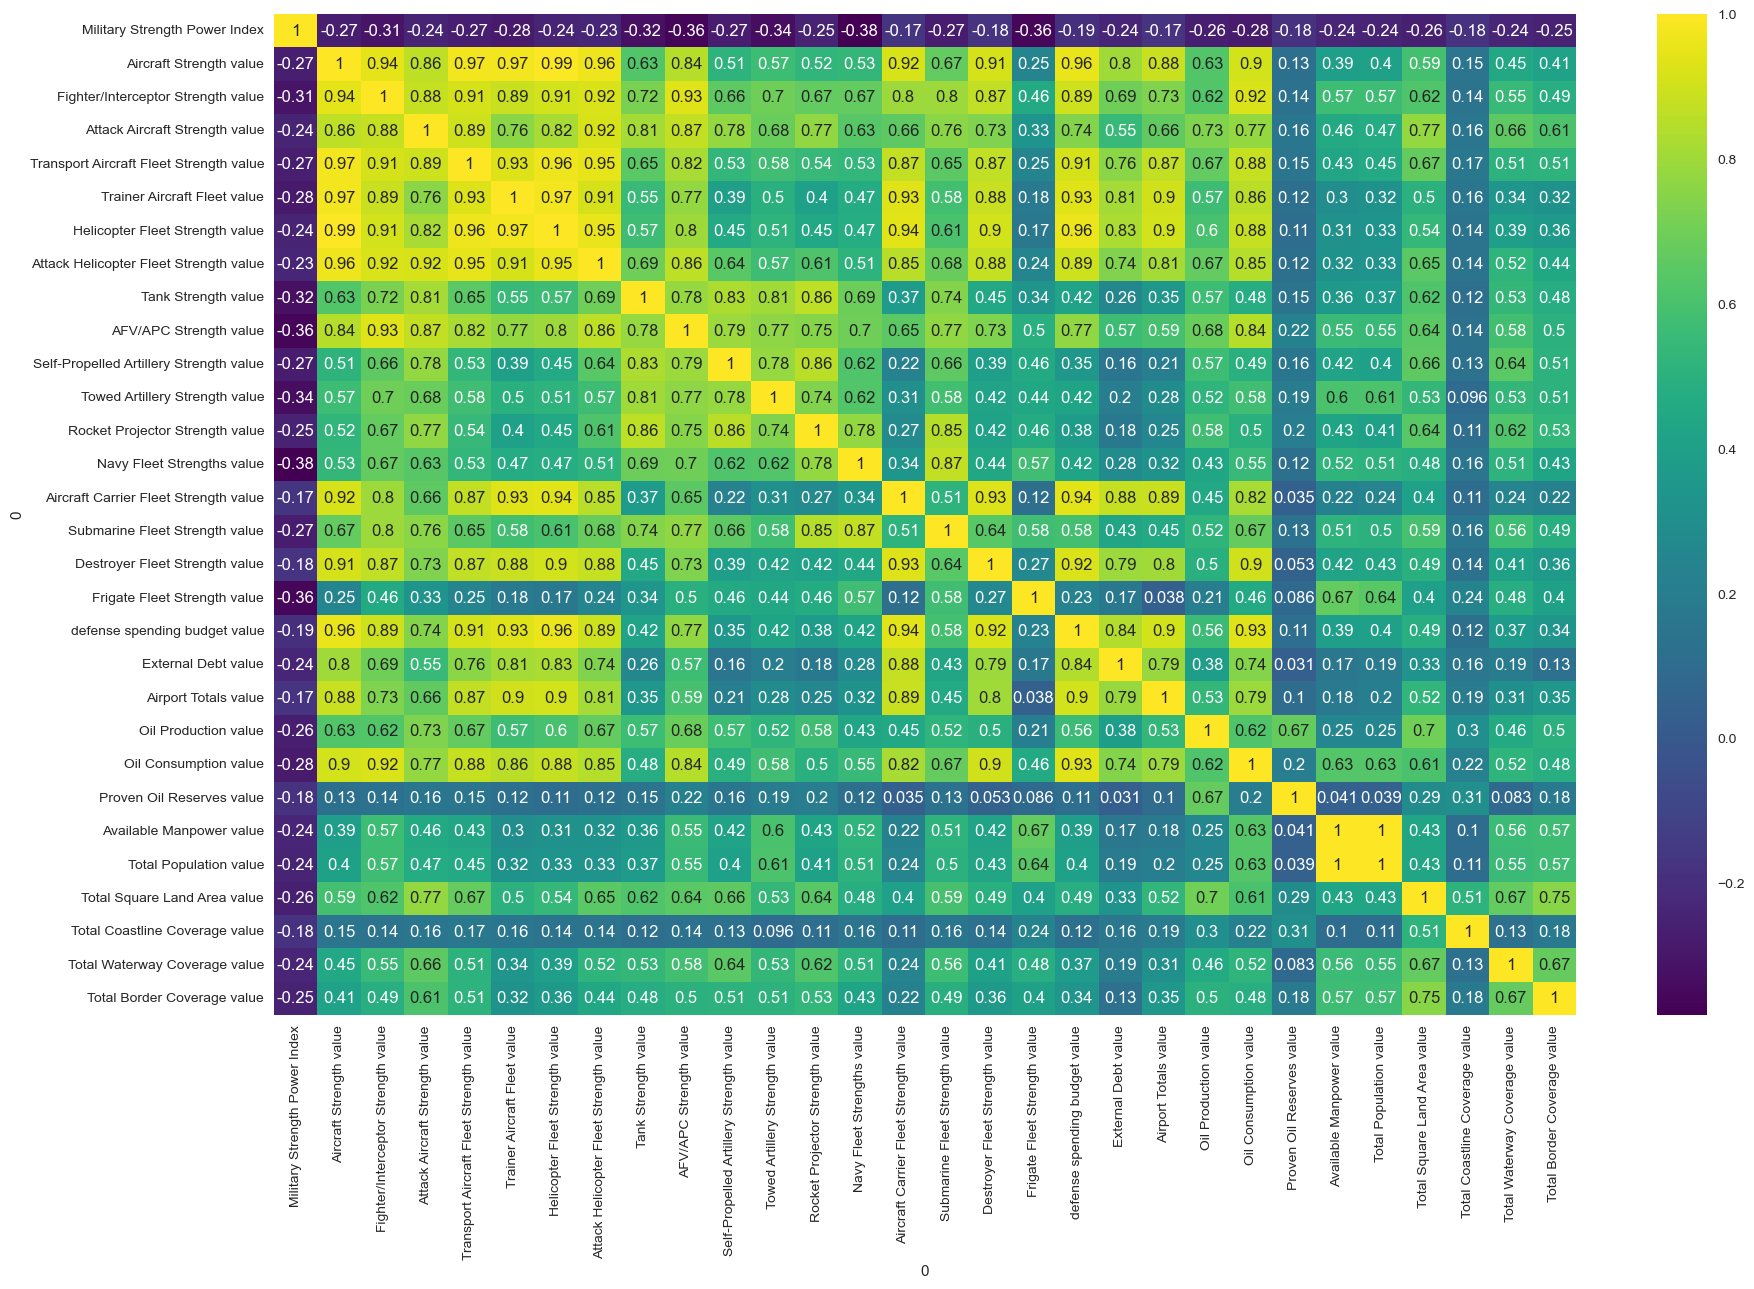

In [19]:
plt.figure(figsize=(21,13))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis');

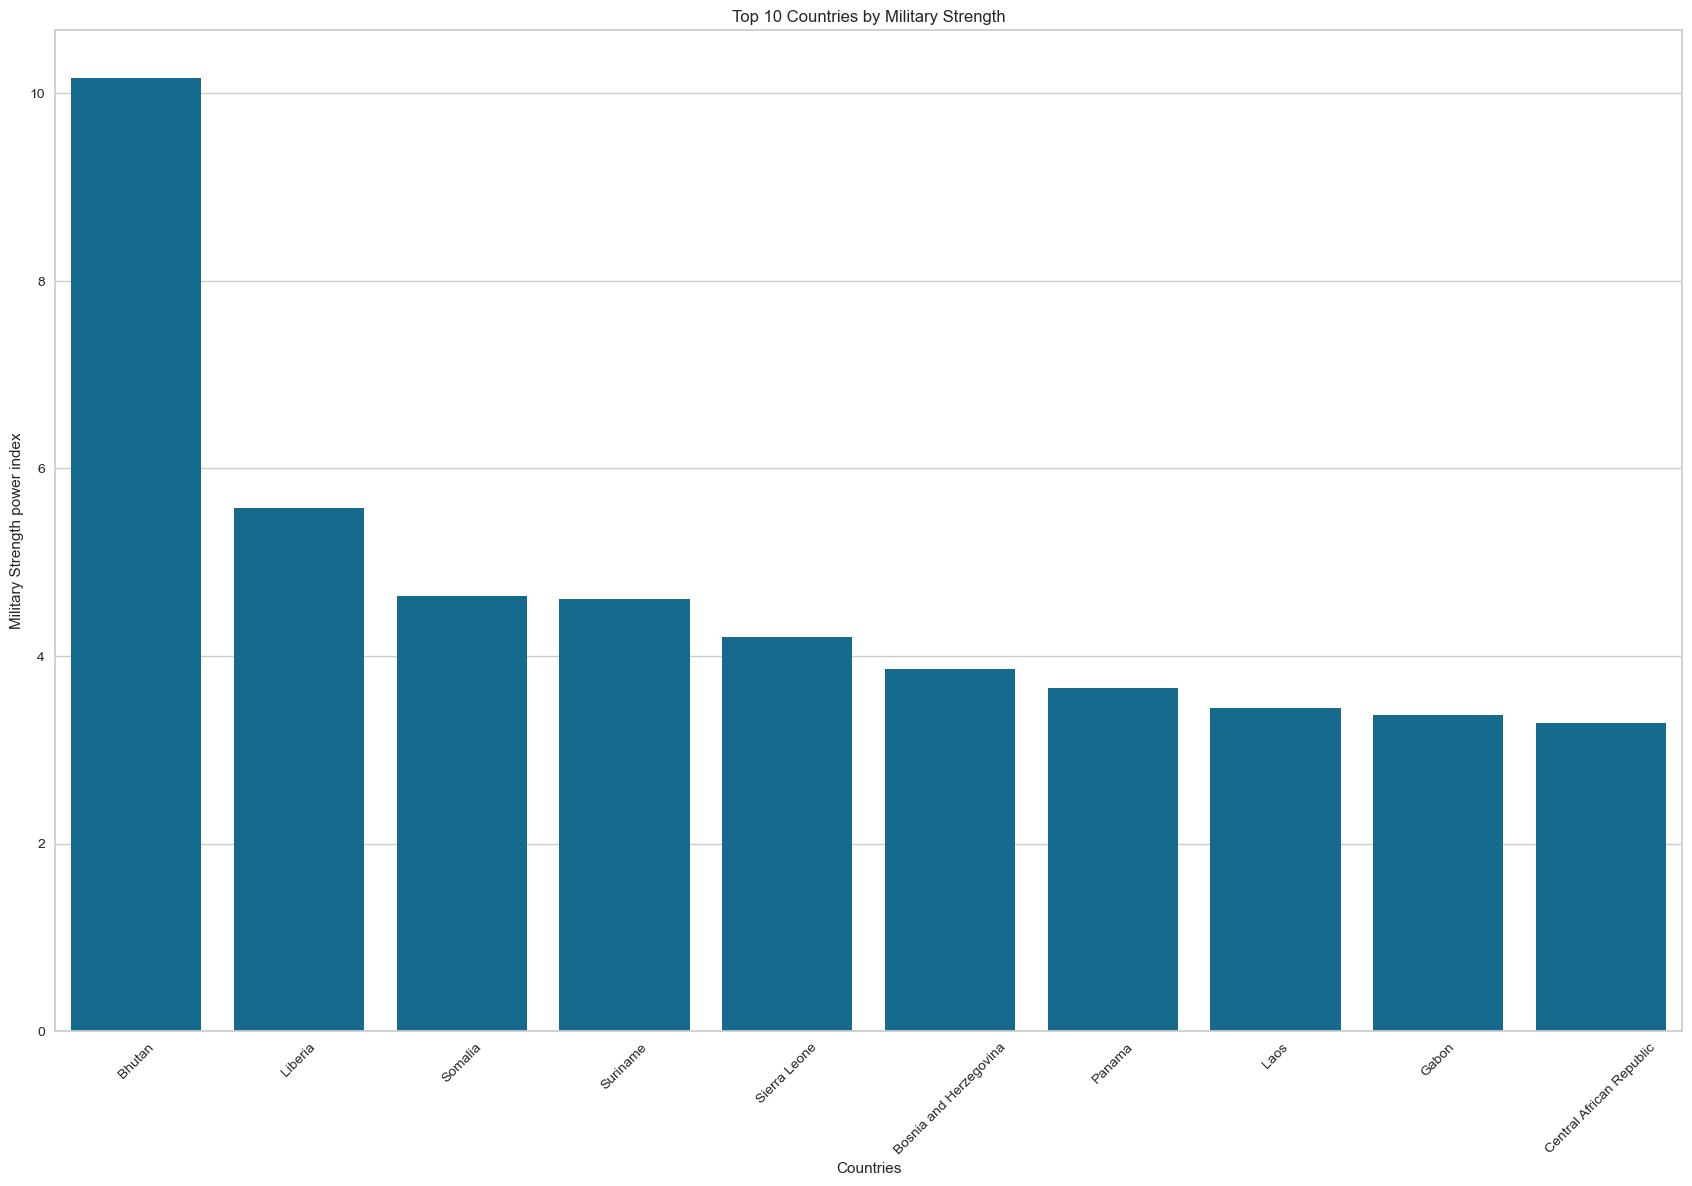

In [20]:
# DataFrame'i sıralama ve en üst 10 değeri alma
sorted_df = df.sort_values(by="Military Strength Power Index", ascending=False)
top_10_df = sorted_df.head(10)

# Çubuk grafiği oluşturma
plt.figure(figsize=(21, 13))
plt.xticks(rotation=45)
sns.barplot(x=top_10_df["Countries"], y=top_10_df["Military Strength Power Index"])

# Grafiği gösterme
plt.title('Top 10 Countries by Military Strength')
plt.xlabel('Countries')
plt.ylabel('Military Strength power index')
plt.show()

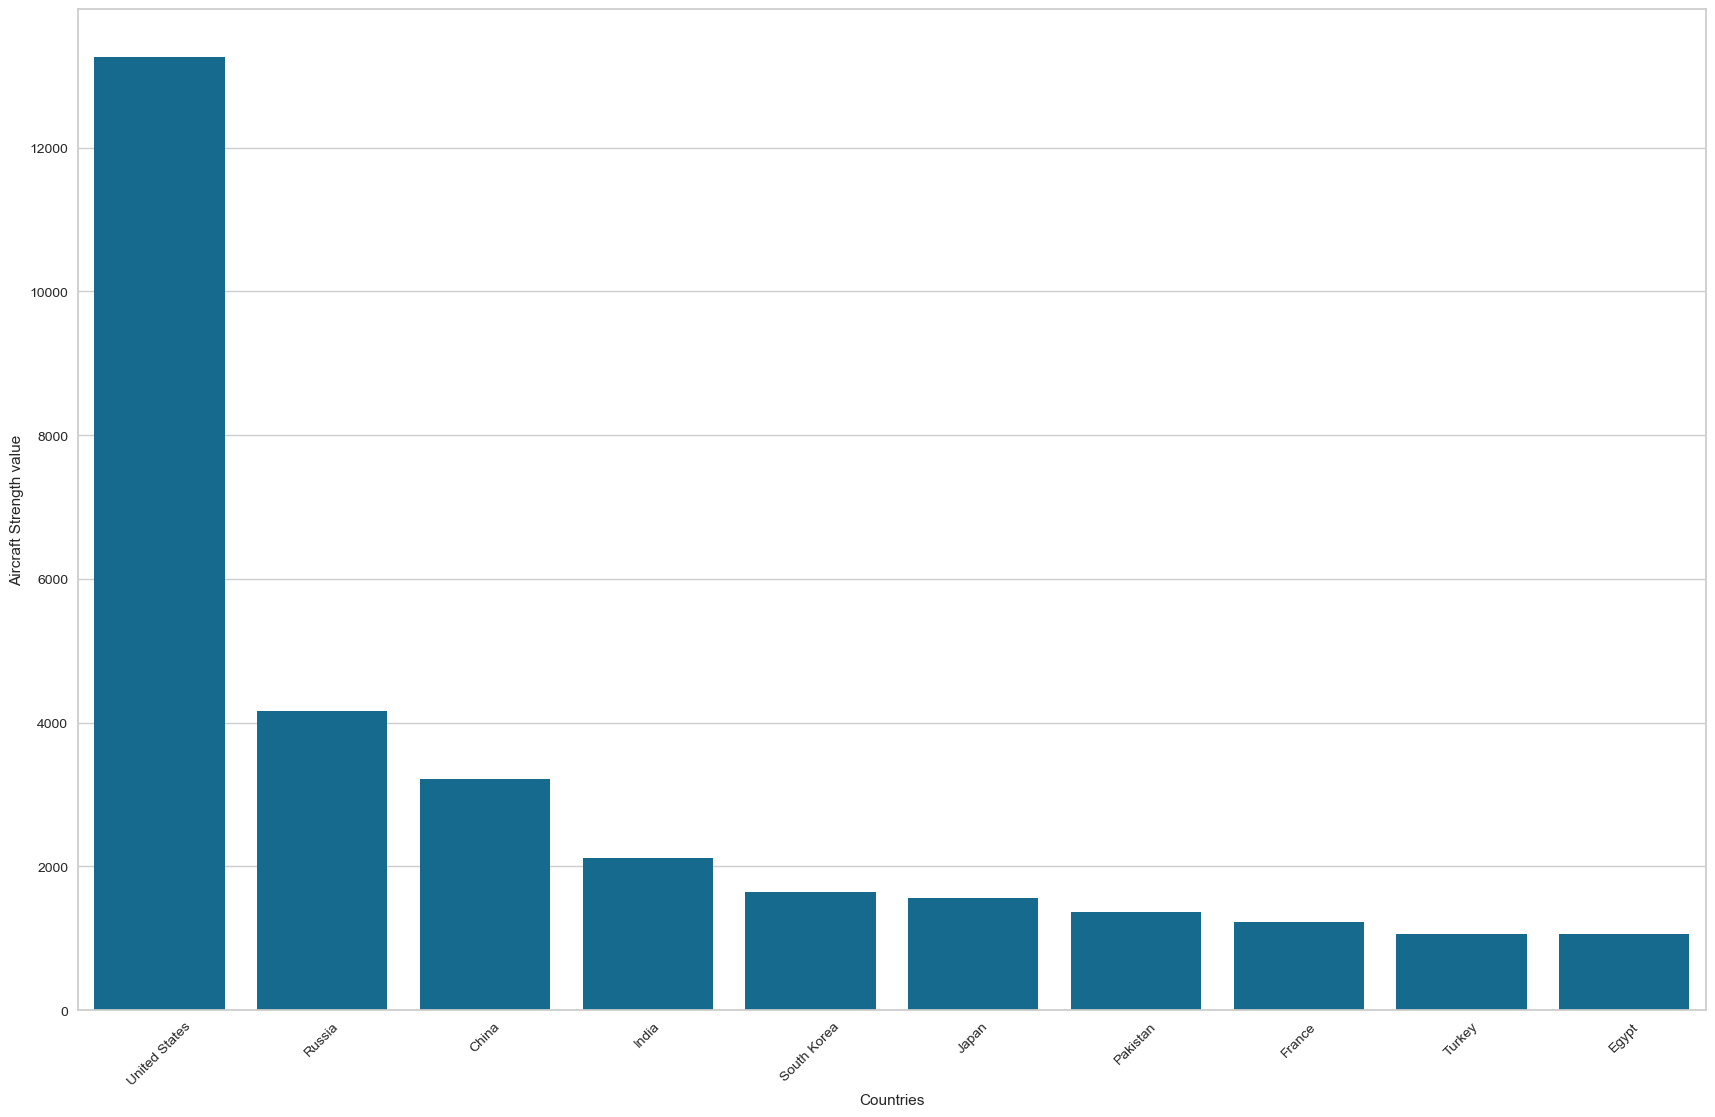

In [21]:
# DataFrame'i sıralama ve en üst 10 değeri alma
sorted_df = df.sort_values(by="Aircraft Strength value", ascending=False)
top_10_df = sorted_df.head(10)

# Çubuk grafiği oluşturma
plt.figure(figsize=(21, 13))
plt.xticks(rotation=45)
sns.barplot(x=top_10_df["Countries"], y=top_10_df["Aircraft Strength value"])

# Grafiği gösterme
plt.title
plt.xlabel
plt.ylabel
plt.show()

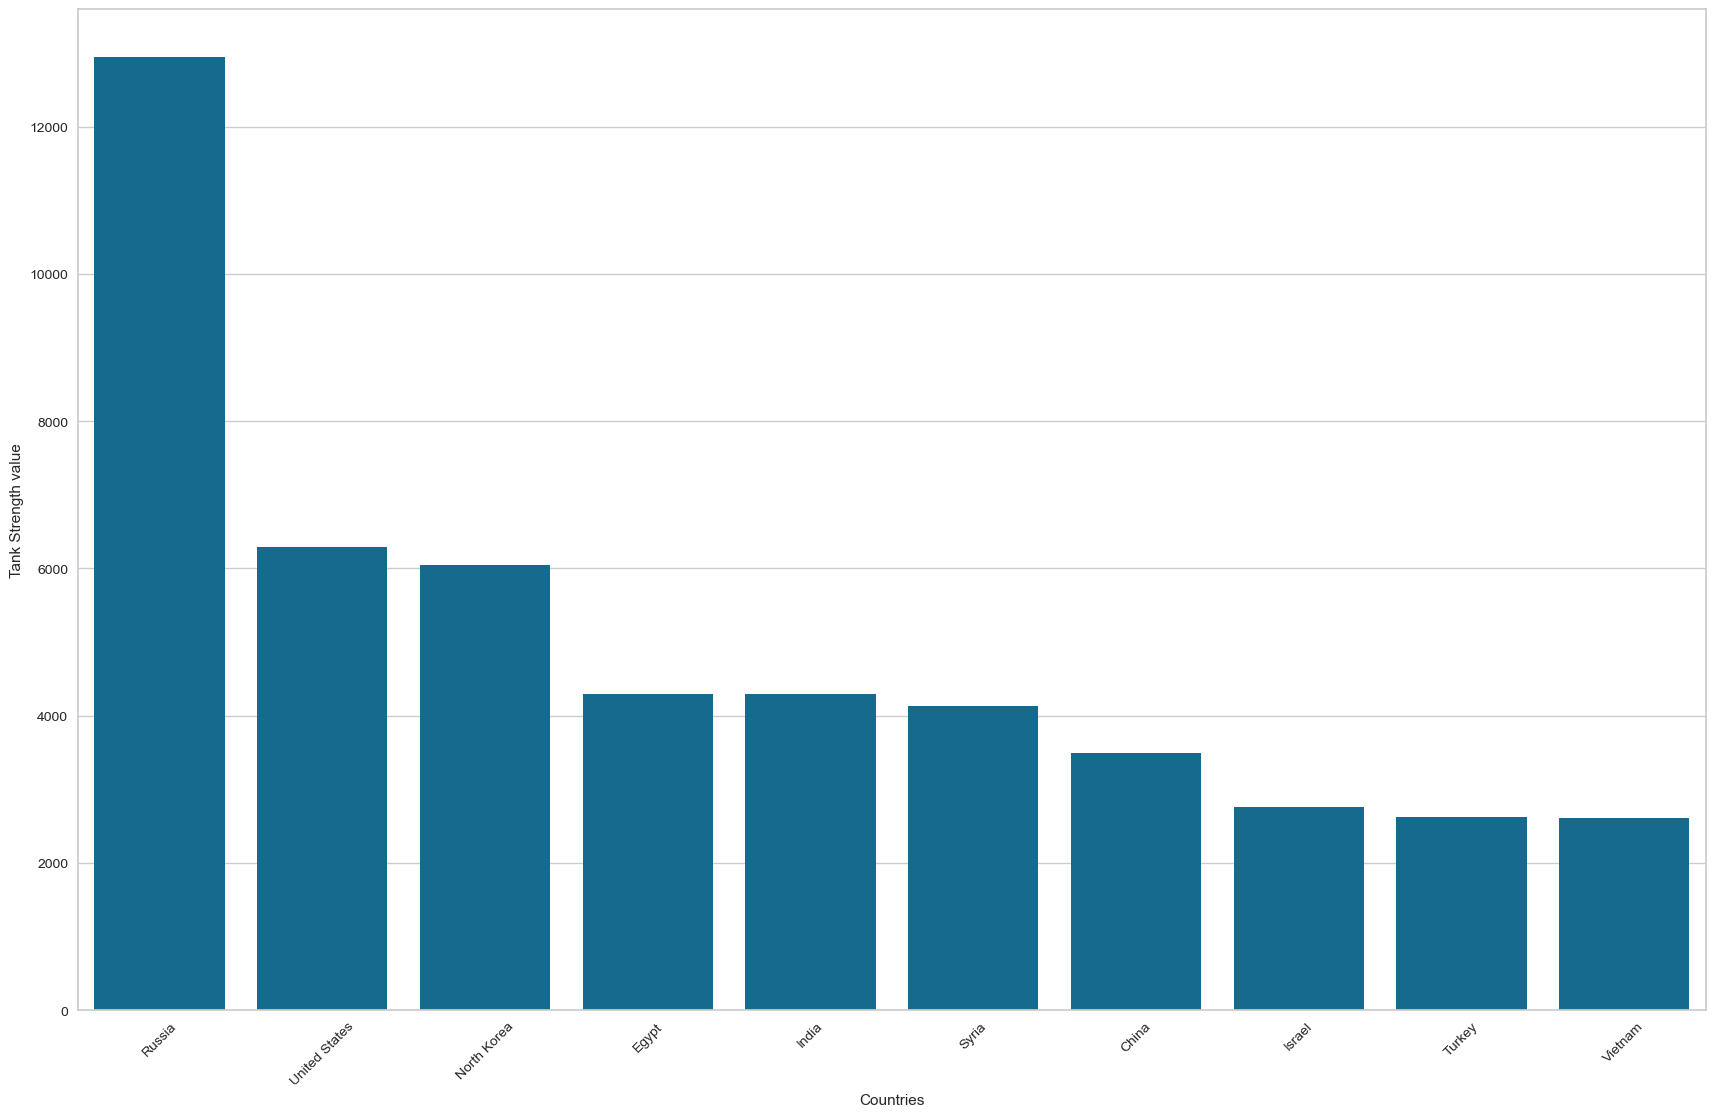

In [22]:
# DataFrame'i sıralama ve en üst 10 değeri alma
sorted_df = df.sort_values(by="Tank Strength value", ascending=False)
top_10_df = sorted_df.head(10)

# Çubuk grafiği oluşturma
plt.figure(figsize=(21, 13))
plt.xticks(rotation=45)
sns.barplot(x=top_10_df["Countries"], y=top_10_df["Tank Strength value"])

# Grafiği gösterme
plt.title
plt.xlabel
plt.ylabel
plt.show()

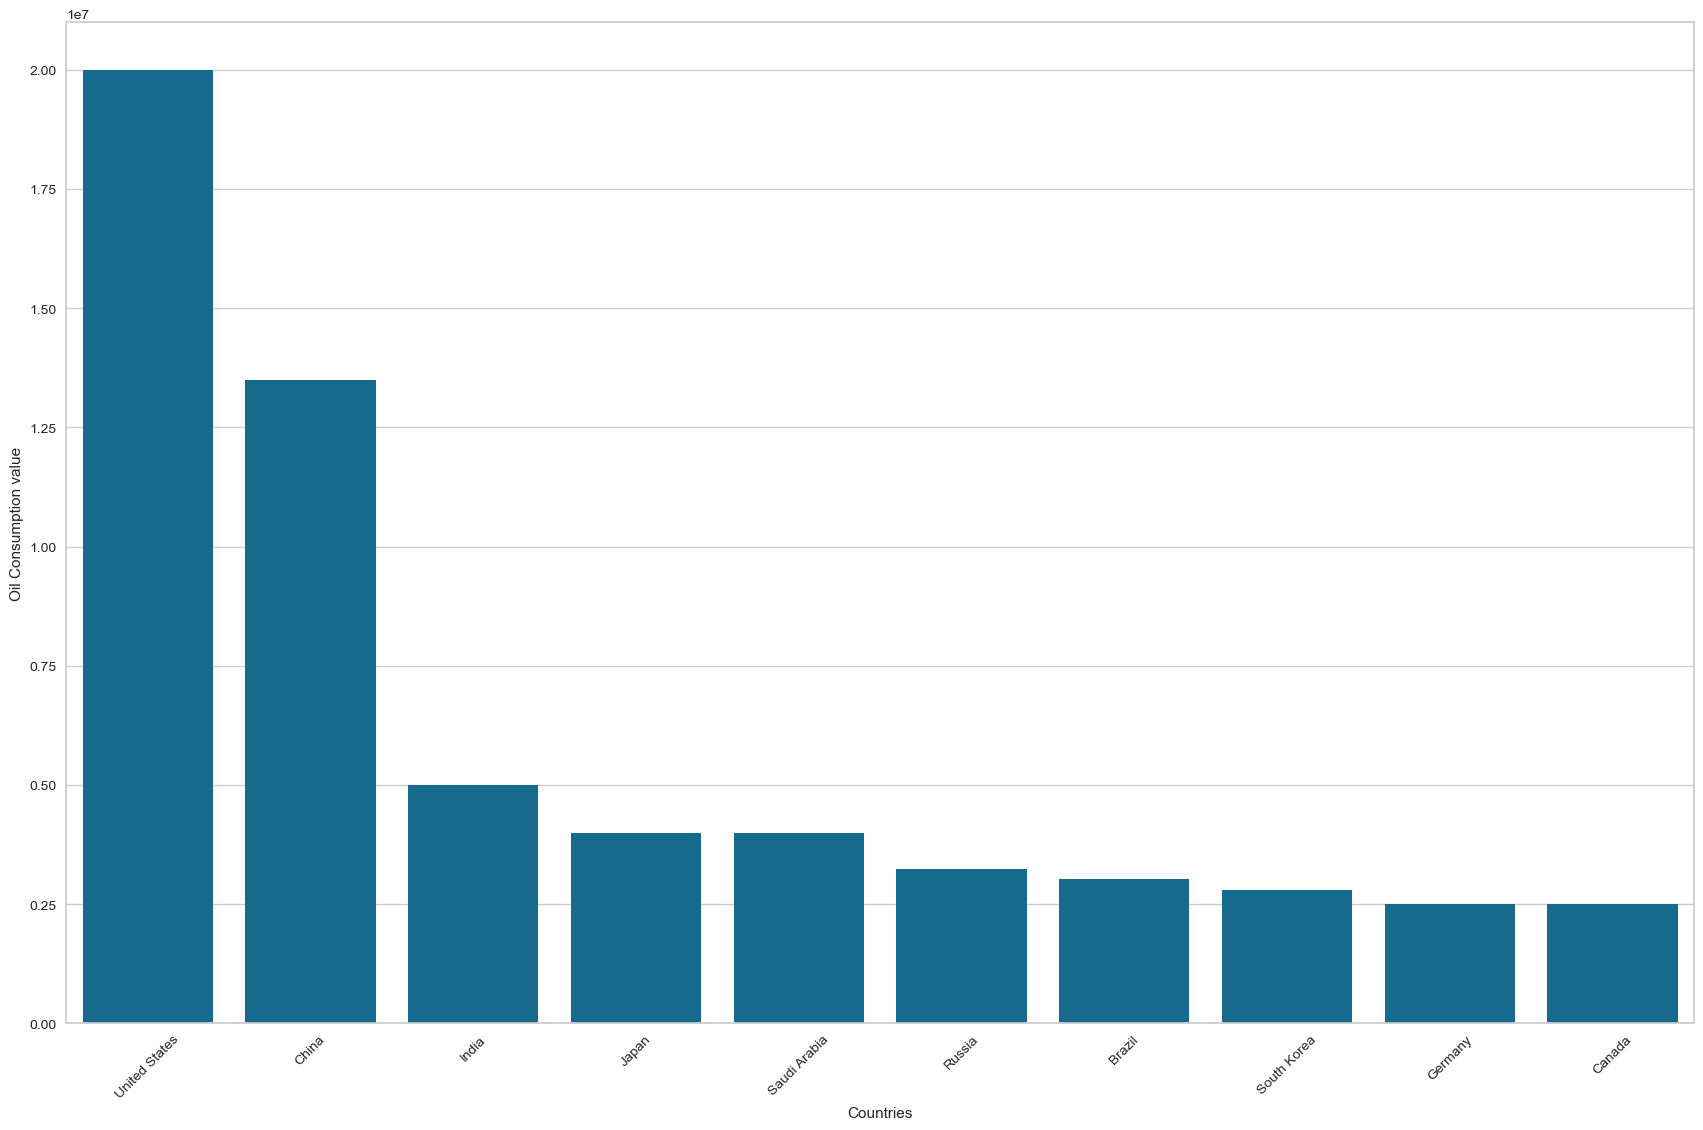

In [23]:
# DataFrame'i sıralama ve en üst 10 değeri alma
sorted_df = df.sort_values(by="Oil Consumption value", ascending=False)
top_10_df = sorted_df.head(10)

# Çubuk grafiği oluşturma
plt.figure(figsize=(21, 13))
plt.xticks(rotation=45)
sns.barplot(x=top_10_df["Countries"], y=top_10_df["Oil Consumption value"])

# Grafiği gösterme
plt.title
plt.xlabel
plt.ylabel
plt.show()

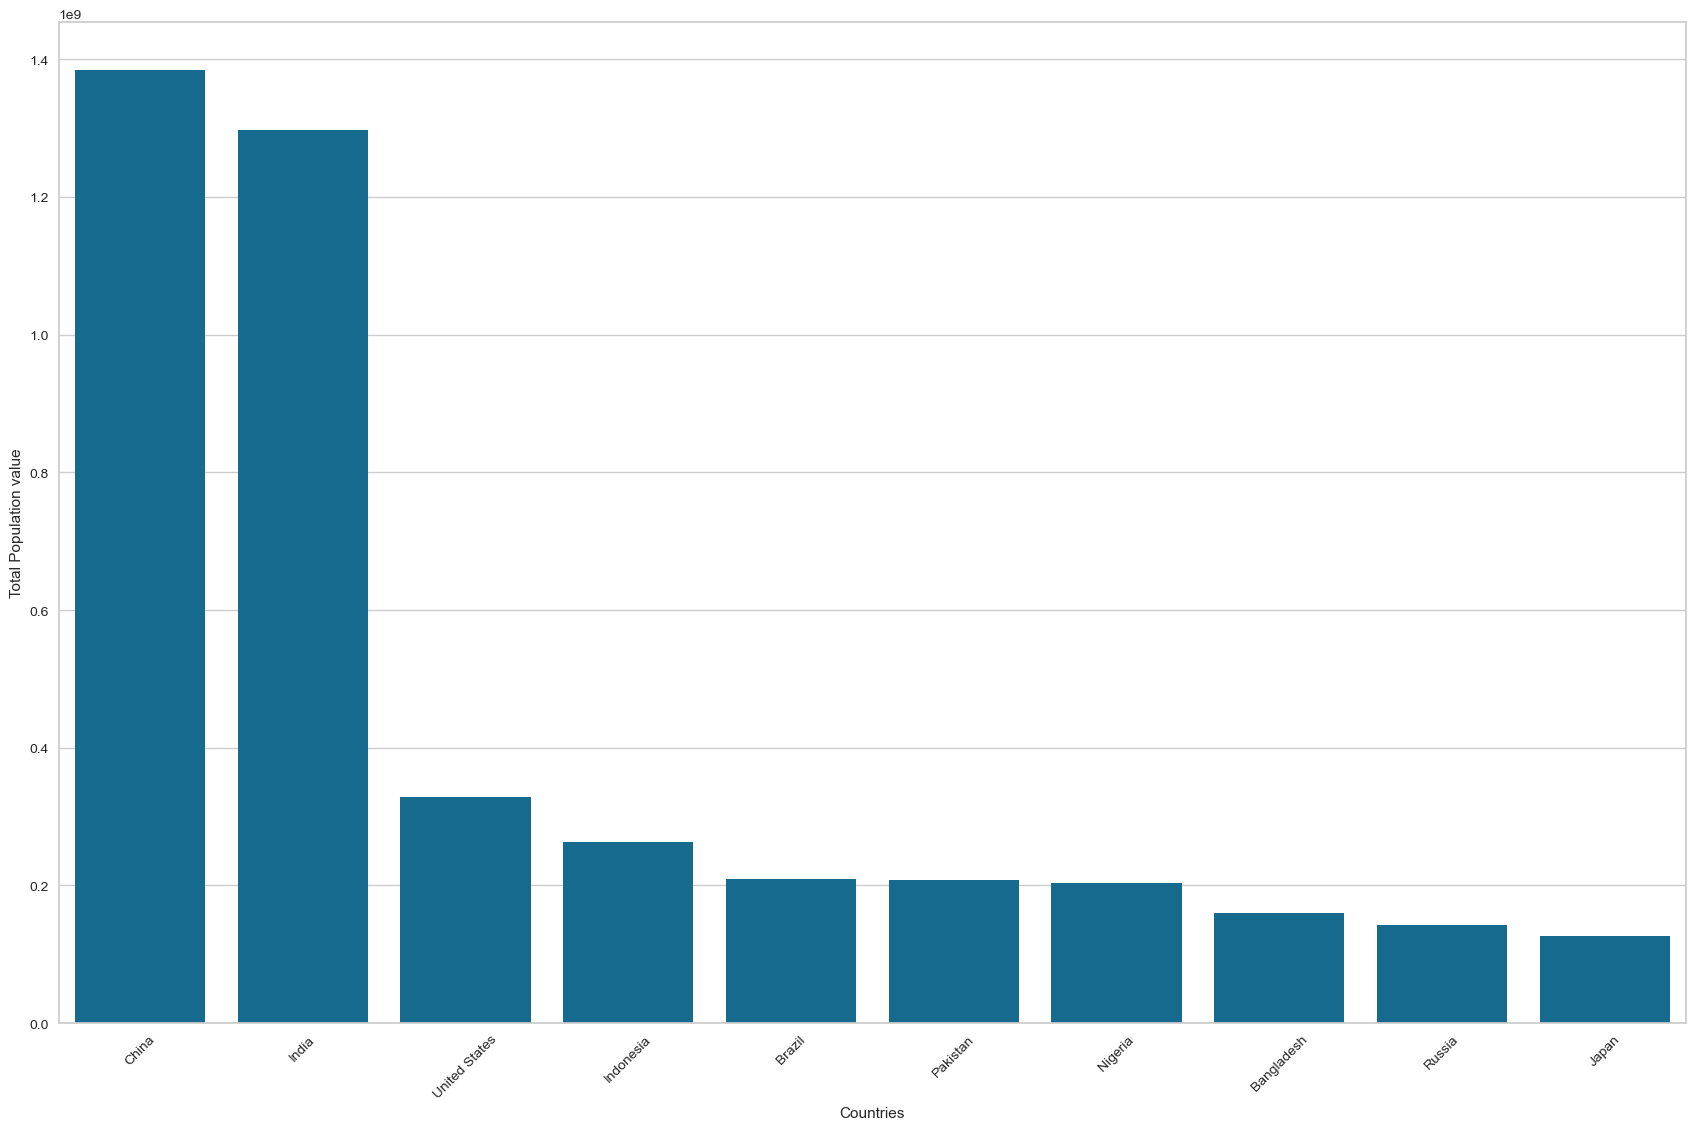

In [24]:
# DataFrame'i sıralama ve en üst 10 değeri alma
sorted_df = df.sort_values(by="Total Population value", ascending=False)
top_10_df = sorted_df.head(10)

# Çubuk grafiği oluşturma
plt.figure(figsize=(21, 13))
plt.xticks(rotation=45)
sns.barplot(x=top_10_df["Countries"], y=top_10_df["Total Population value"])

# Grafiği gösterme
plt.title
plt.xlabel
plt.ylabel
plt.show()

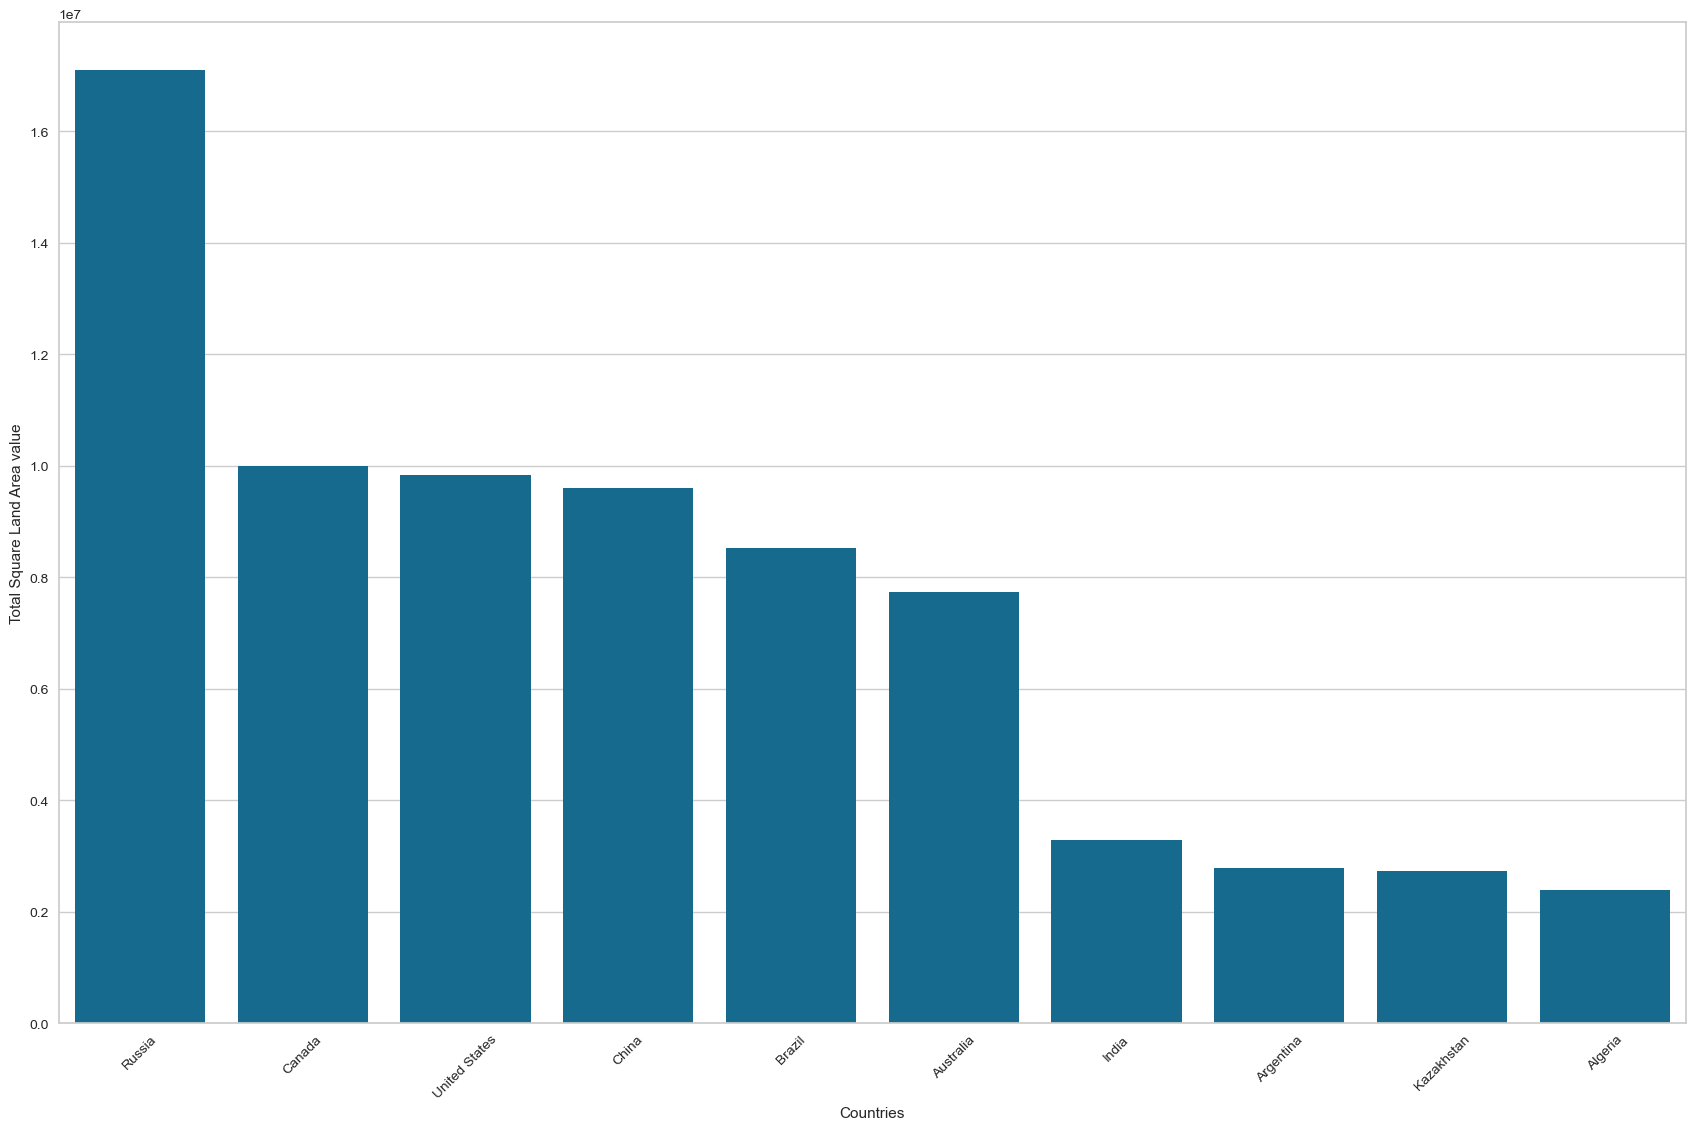

In [25]:
# DataFrame'i sıralama ve en üst 10 değeri alma
sorted_df = df.sort_values(by="Total Square Land Area value", ascending=False)
top_10_df = sorted_df.head(10)

# Çubuk grafiği oluşturma
plt.figure(figsize=(21, 13))
plt.xticks(rotation=45)
sns.barplot(x=top_10_df["Countries"], y=top_10_df["Total Square Land Area value"])

# Grafiği gösterme
plt.title
plt.xlabel
plt.ylabel
plt.show()

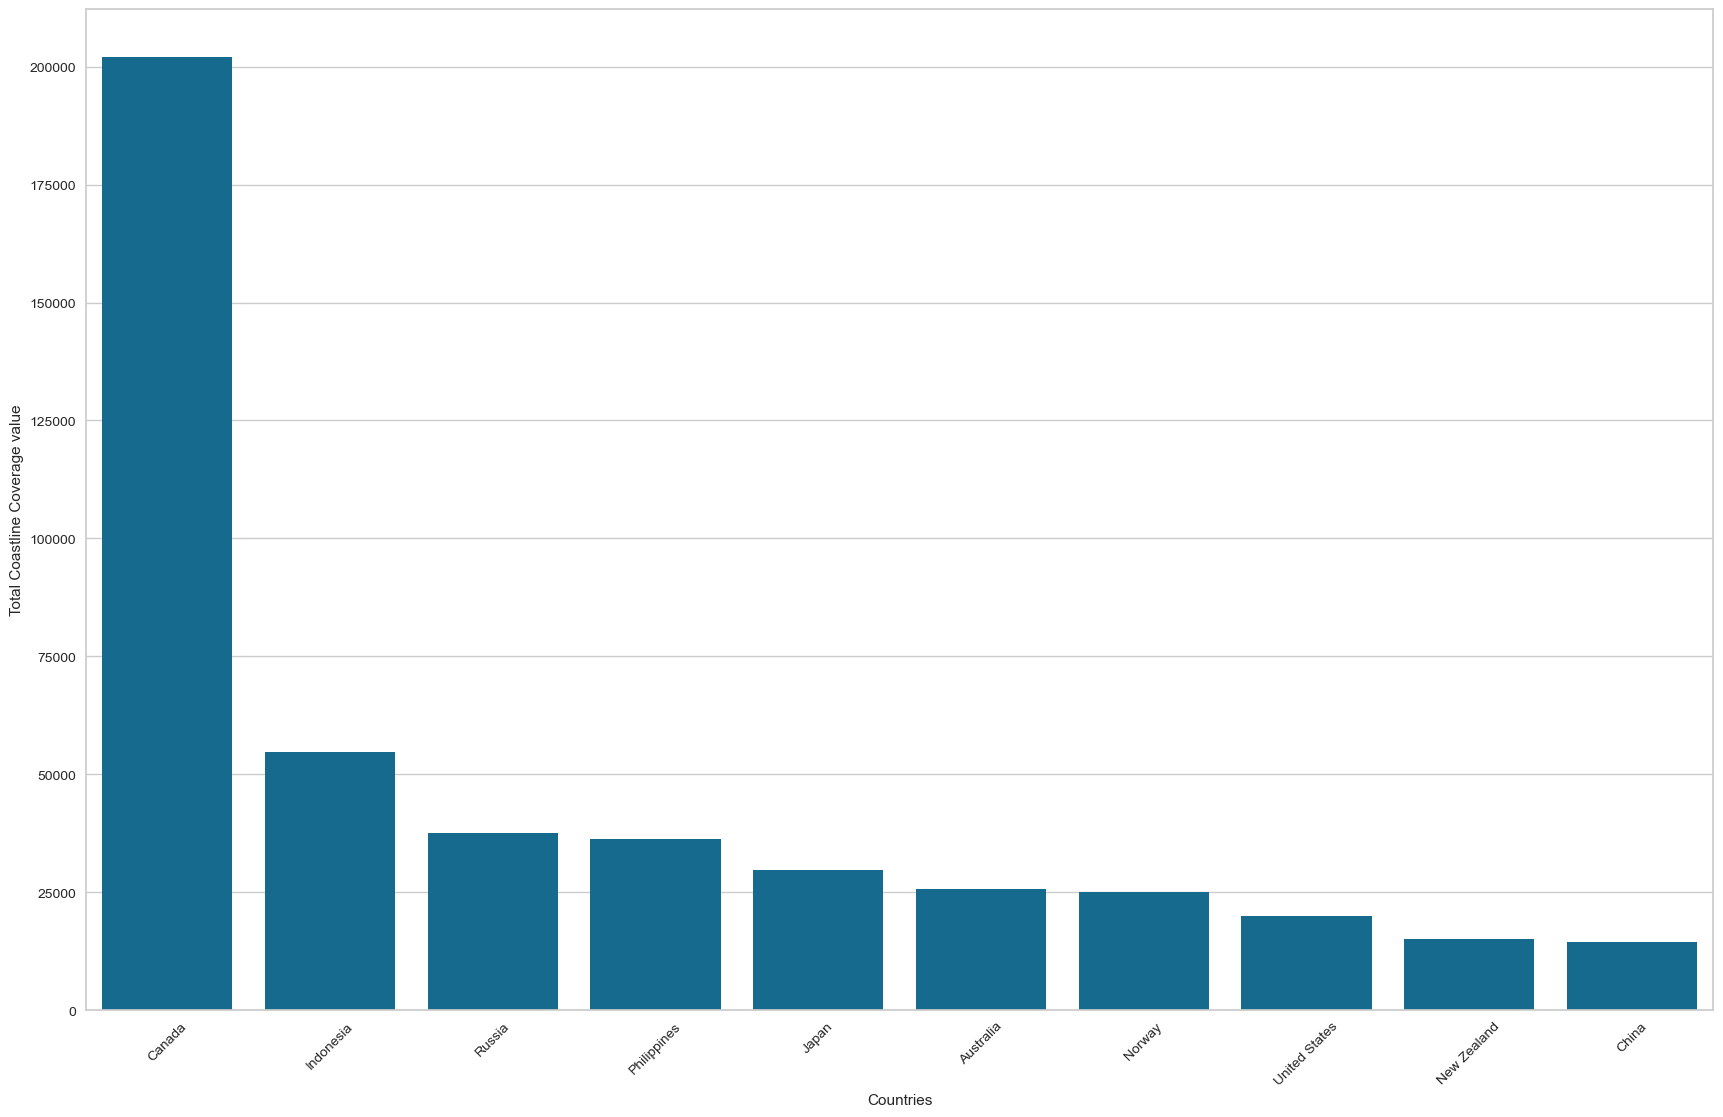

In [26]:
# DataFrame'i sıralama ve en üst 10 değeri alma
sorted_df = df.sort_values(by="Total Coastline Coverage value", ascending=False)
top_10_df = sorted_df.head(10)

# Çubuk grafiği oluşturma
plt.figure(figsize=(21, 13))
plt.xticks(rotation=45)
sns.barplot(x=top_10_df["Countries"], y=top_10_df["Total Coastline Coverage value"])

# Grafiği gösterme
plt.title
plt.xlabel
plt.ylabel
plt.show()

### Modelling(Cluster)

In [27]:
x=df.drop(['Countries'],axis=1)

In [28]:
model=KMeans(4)

In [29]:
model=model.fit(x)

In [30]:
tahmin=model.predict(x)

In [31]:
tahmin

array([0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0])

In [32]:
x['cluster']=tahmin

In [33]:
x.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster
1,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0,0,0,0,0,1.200000e+10,2.840000e+09,43,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987,0
2,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38,0,0,0,0,2.500000e+08,9.505000e+09,4,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691,0
3,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201,0,6,0,5,1.300000e+10,6.260000e+09,157,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734,0
4,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57,0,0,0,0,7.000000e+09,4.208000e+10,176,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369,0
5,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49,0,2,4,0,4.200000e+09,2.149000e+11,1138,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968,0


In [34]:
silhouette_score(x,tahmin)

0.8671436271439987

In [35]:
wcss=[]    #wcss değerini saklar.
ss=[]       #siluet skorunu saklar.
for i in range(2,10):     #2 den 9 a kadar döngü 
    model=KMeans(i)       #kmeans modeli oluşturur
    model=model.fit(x)    #veriler fit edilir.
    tahmin=model.predict(x)   #tahmin
    ss1=silhouette_score(x,tahmin)   #silhoutte skorunu hesaplar
    ss.append(ss1)             #wcss değerini hesaplar.
    print(ss1)
    wcss.append(model.inertia_)
    

0.9227153206136329
0.8995442950361631
0.8671436271439987
0.8537597467984916
0.7789462745536555
0.7767544503284178
0.7766982061360016
0.7809562458841909


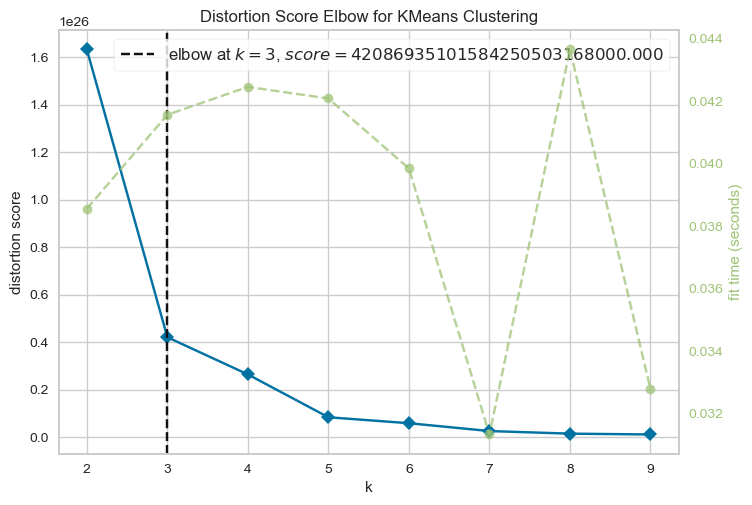

In [36]:
km=KMeans()    #boş bir kmeans modeli oluşturur.
vis=KElbowVisualizer(km,k=(2,10))   #küme sayısı aralığı verir.
vis.fit(x)
vis.show();

Bu grafiğe göre;
Grafikteki siyah kesik çizgi, dirsek noktasını (elbow point) belirtmektedir. Bu nokta, k=3 olarak gösterilmektedir.
Bu noktada WCSS'in azalma hızı belirgin bir şekilde yavaşlamaktadır. Yani, k=3'ten daha fazla küme sayısı seçildiğinde, her eklenen kümenin WCSS üzerindeki katkısı daha az olmakta ve modelin karmaşıklığı artmaktadır.

### Historical Clustering

In [37]:
data=linkage(x, method='ward', metric='euclidean')

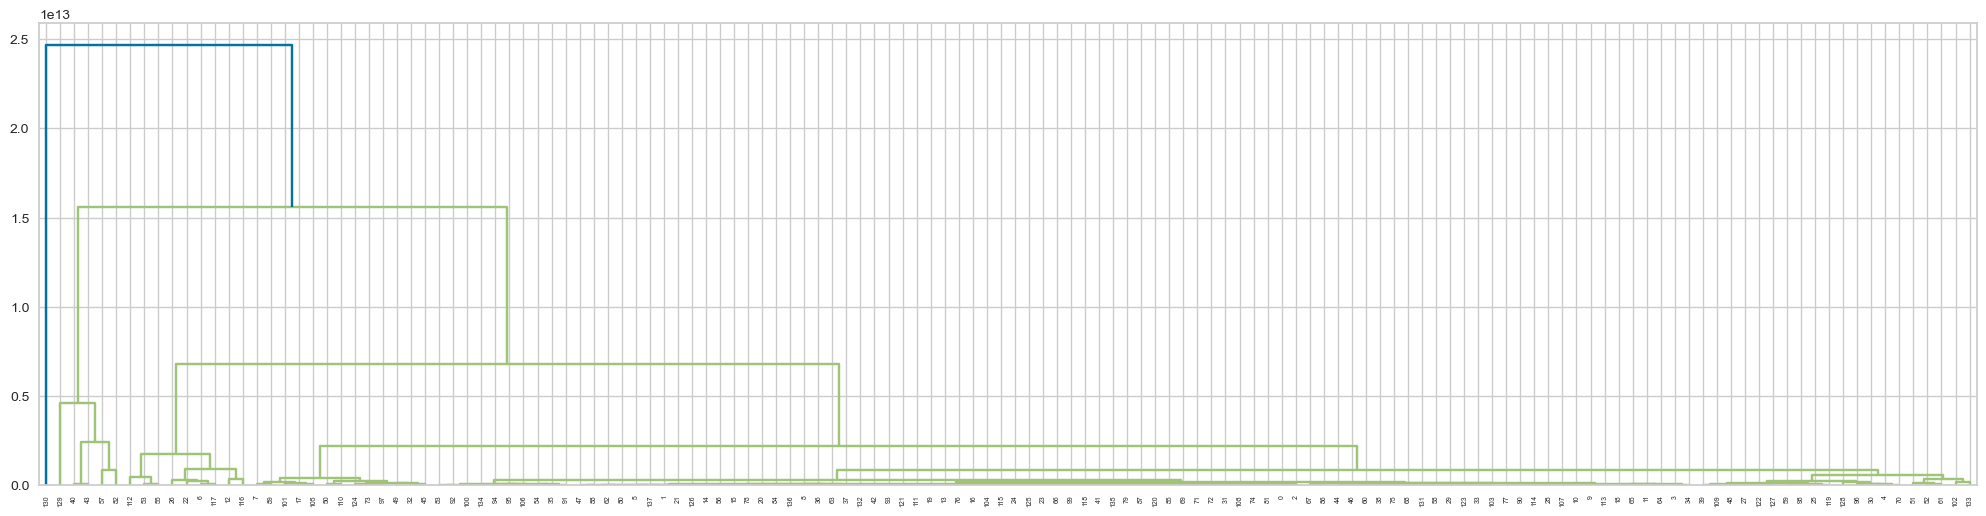

In [38]:
plt.figure(figsize=(25,6))
dendrogram(data);

In [39]:
x['Countries']=df['Countries']

In [40]:
x[x['cluster']==1]


,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster,Countries
41,0.1702,1229,269,0,121,187,589,62,528,6028,109,12,13,180,4,9,11,11,4.150000e+10,5.360000e+12,464,15170.0,1600000.0,7.235000e+07,30111868.0,67364357.0,643801.0,4853.0,8501.0,4072,1,France
44,0.2186,712,128,74,71,26,386,56,245,4583,108,0,38,80,0,6,0,9,5.000000e+10,5.326000e+12,539,43410.0,2500000.0,1.454000e+08,37010559.0,80457737.0,357022.0,2389.0,7467.0,3694,1,Germany
83,0.5919,168,61,1,4,27,75,28,18,1546,57,160,0,63,0,4,0,6,1.241900e+10,4.063000e+12,29,18170.0,840000.0,1.132000e+08,7820960.0,17151228.0,41543.0,451.0,6237.0,1053,1,Netherlands
130,0.1717,733,133,15,44,241,312,49,227,5000,89,126,35,88,2,10,6,13,5.510000e+10,8.126000e+12,460,910500.0,1600000.0,2.564000e+09,29948413.0,65105246.0,243610.0,12429.0,3200.0,443,1,United Kingdom


In [41]:
x[x['cluster']==2]


,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster,Countries
131,0.0606,13264,2085,715,945,2643,5768,967,6289,39253,1465,2740,1366,490,20,66,91,0,7.500000e+11,1.791000e+13,13513,9352000.0,20000000.0,3.652000e+10,144872845.0,329256465.0,9826675.0,19924.0,41009.0,12048,2,United States


In [42]:
x[x['cluster']==3]

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster,Countries
7,0.3225,464,82,6,38,174,133,22,59,3051,0,54,0,48,2,6,2,8,2.630000e+10,1.714000e+12,480,263000.0,1005000.0,1.821000e+09,10808002.0,2.347014e+07,7741220.0,25760.0,2000.0,0,3,Australia
13,1.0499,148,43,0,12,64,29,0,0,984,0,0,0,17,0,0,0,2,4.921000e+09,1.281000e+12,41,0.0,645000.0,0.000000e+00,4833107.0,1.157076e+07,30528.0,67.0,2043.0,1297,3,Belgium
23,0.3712,385,62,0,38,135,145,0,80,1973,0,133,0,64,0,4,0,12,2.250000e+10,1.608000e+12,1467,3977000.0,2500000.0,1.697000e+11,16110865.0,3.588166e+07,9984670.0,202080.0,636.0,8893,3,Canada
27,0.0691,3210,1232,371,224,314,911,281,3500,33000,3800,3600,2650,777,2,74,36,52,2.370000e+11,1.598000e+12,507,3838000.0,13500000.0,2.562000e+10,752855402.0,1.384689e+09,9596961.0,14500.0,110000.0,22457,3,China
54,1.9481,19,0,0,0,8,8,0,0,124,0,0,0,8,0,0,0,0,8.700000e+08,2.470000e+12,40,0.0,145000.0,0.000000e+00,2366779.0,5.068050e+06,70273.0,1448.0,956.0,443,3,Ireland
56,0.2111,860,99,110,38,185,439,59,200,6947,54,108,21,249,2,8,4,12,2.780000e+10,2.444000e+12,129,77530.0,1300000.0,5.567000e+08,28011003.0,6.224667e+07,301340.0,7600.0,2400.0,1836,3,Italy
58,0.1501,1561,279,12,60,427,637,119,1004,3130,238,500,99,155,4,20,40,0,4.900000e+10,3.240000e+12,175,3841.0,4000000.0,4.412000e+07,53873803.0,1.261682e+08,377915.0,29751.0,1770.0,0,3,Japan
113,0.3388,512,137,12,46,162,162,19,327,2023,95,140,0,77,1,3,0,11,1.510000e+10,2.094000e+12,150,2252.0,1226000.0,1.500000e+08,23136275.0,4.933108e+07,505370.0,4964.0,1000.0,1953,3,Spain
118,0.5259,169,54,0,18,54,42,0,326,1338,224,0,0,0,0,0,0,0,5.000000e+09,1.664000e+12,63,0.0,260000.0,0.000000e+00,3632250.0,8.292809e+06,41277.0,0.0,1299.0,1770,3,Switzerland
